## Naive Matrix Multiplication

In [17]:
import numpy as np

#A function that takes two input arrays and performs a matrix multiplication using the naive method
def multiply_naive(A, B):
    #Check arrays have the correct dimensions to perform matrix multiplication
    if len(A[0]) != len(B):
        raise ValueError("Error: Matrix dimensions are not compatible")

    A = np.array(A)
    B = np.array(B)
    
    #Create an empty array to store the result of the matrix multiplication
    C = np.zeros((len(A), len(B[0])))

    #Perform the matrix multiplication
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                #Update each element of the result matrix
                C[i][j] += A[i][k] * B[k][j]
                
    return C


### Unit Tests

The unit tests below test the naive implementation for matrix multiplication for multiplying an mxn matrix with an nxp matrix. This is done for all possible values of m,n, and p in the range(1,8). The results are verified against the result of numpy matmul.

In [18]:
import unittest
import itertools

#Unit tests for the naive matrix multiplication function
class TestMatrixMultiply(unittest.TestCase):
    def test_multiply_naive(self):
        for m,n,p in itertools.product(range(1, 8),repeat=3):
            A = np.random.rand(m, n)
            B = np.random.rand(n, p)
            
            M = multiply_naive(A, B)

            self.assertTrue(np.allclose(M, np.matmul(A,B)))

unittest.main(argv=[''], verbosity=2, exit=False)

test_multiply_strassen (__main__.Test) ... ok
test_multiply_naive (__main__.TestMatrixMultiply) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.506s

OK


## Strassen Matrix Multiplication

In [40]:
import numpy as np
import math as m

def multiply_strassen(A, B, first_iteration=True):
    #At the first level of recursion we pad the matrices to ensure 
    #they are both square, have the same dimensions, and that those
    #dimensions are a power of 2.
    if first_iteration:
        #Ensure that we are working with numpy arrays. This is not needed
        #at deeper levels of recursion as only numpy arrays are passed as input
        A = np.array(A)
        B = np.array(B)
        
        #For non-square matrices we will need to slice the final matrix by the 
        #appropriate dimensions to give the correct output. At deeper levels of recursion
        #we already ensure that the input atrices are square
        output_row_dim = len(A)
        output_col_dim = len(B[0])

        if len(A[0]) != len(B):
            raise ValueError("Matrices must be m*n and n*p to multiply")
        
        #Find the largest dimension of the two input matrices and pad all dimensions to the 
        #nearest power of 2 that is >= that dimension
        max_dim = max(len(A),len(A[0]),len(B),len(B[0]))
        exponent = np.log2(max_dim)
        power = int(m.ceil(exponent))

        #If the length of the matrix is not a power of 2, pad it with zeros
        if len(A) != 2**power or len(A[0]) != 2**power:
            A = np.pad(A, ((0, 2**power-len(A)), (0, 2**power-len(A[0]))), 'constant', constant_values=(0))
        if len(B) != 2**power or len(B[0]) != 2**power:
            B = np.pad(B, ((0, 2**power-len(B)), (0, 2**power-len(B[0]))), 'constant', constant_values=(0))

    #Base case
    n = len(A)
    if n <= 2:
        C = multiply_naive(A, B)

    #Recursive case
    else:
        #Split both matrices into 4 quadrants
        A11 = A[0:n//2, 0:n//2]
        A12 = A[0:n//2, n//2:n]
        A21 = A[n//2:n, 0:n//2]
        A22 = A[n//2:n, n//2:n]

        B11 = B[0:n//2, 0:n//2]
        B12 = B[0:n//2, n//2:n]
        B21 = B[n//2:n, 0:n//2]
        B22 = B[n//2:n, n//2:n]

        #Apply Strassen's method
        M1 = multiply_strassen(A11 + A22, B11 + B22, False)
        M2 = multiply_strassen(A21 + A22, B11, False)
        M3 = multiply_strassen(A11, B12 - B22, False)
        M4 = multiply_strassen(A22, B21 - B11, False)
        M5 = multiply_strassen(A11 + A12, B22, False)
        M6 = multiply_strassen(A21 - A11, B11 + B12, False)
        M7 = multiply_strassen(A12 - A22, B21 + B22, False)

        C11 = M1 + M4 - M5 + M7
        C12 = M3 + M5
        C21 = M2 + M4
        C22 = M1 - M2 + M3 + M6

        #Fill empty array with the four 'quadrant' results of the previous method
        C = np.zeros((n,n))
        C[0:n//2, 0:n//2] = C11
        C[0:n//2, n//2:n] = C12
        C[n//2:n, 0:n//2] = C21
        C[n//2:n, n//2:n] = C22

    #If this is a recursive case then just return C as the calling function
    #will be expecting a square matrix
    if not first_iteration:
        return C
    
    #Slice the final matrix according to the original input dimensions of A and B
    return C[:output_row_dim, :output_col_dim]

### Unit Tests

The unit tests below test the naive implementation for matrix multiplication for multiplying an mxn matrix with an nxp matrix. This is done for all possible values of m,n, and p in the range(1,8). The results are verified against the result of numpy matmul.

In [20]:
import unittest
import itertools

#Unit tests for the above functions
class Test(unittest.TestCase):
    def test_multiply_strassen(self):
        for m,n,p in itertools.product(range(1, 8),repeat=3):
            A = np.random.rand(m, n)
            B = np.random.rand(n, p)
            
            M = multiply_strassen(A, B)

            self.assertTrue(np.allclose(M, np.matmul(A,B)))

unittest.main(argv=[''], verbosity=2, exit=False)

test_multiply_strassen (__main__.Test) ... ok
test_multiply_naive (__main__.TestMatrixMultiply) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.608s

OK


In [21]:
# import time
# import matplotlib.pyplot as plt
# import scipy.stats as stats

# #A function that takes a function f and args as input and times how long on average it takes f(args) to execute
# def time_function(f, args):
#     #Run the function f(*args) 10 times and store the time taken
#     times = []
#     for i in range(1):
#         start = time.time()
#         f(*args)
#         end = time.time()
#         times.append(end - start)
        
#     #Return the average time taken
#     return np.mean(times)

# #Using the time_function create a plot of how long it takes multiply_naive to execute for different sized matrices A and B
# def time_function_2D(f, sizes):
#     #Create an array to store the average time taken for each size
#     times = []
    
#     #For each size, create a matrix A and B of that size and time how long it takes to execute f(A, B)
#     for size in sizes:
#         A = np.random.rand(size, size)
#         B = np.random.rand(size, size)
#         times.append(time_function(f, [A, B]))
    
#     return sizes, times

# sizes, times = time_function_2D(multiply_strassen, [2**i for i in np.arange(8, 10, 1)])
# plt.plot(sizes, times, label="multiply_strassen")
# # plt.plot(sizes, np.log(times), label="multiply_strassen_log")
# print("Strassen: ", stats.linregress(np.log(sizes), np.log(times)))

# #Plot the average time taken against the size of the matrices
# sizes, times = time_function_2D(multiply_naive, [2**i for i in np.arange(8, 10, 1)])
# plt.plot(sizes, times, label="multiply_naive")
# # plt.plot(sizes, np.log(times), label="multiply_naive_log")
# print("Naive: ", stats.linregress(np.log(sizes), np.log(times)))

# plt.xlabel("Size of matrices")
# plt.ylabel("Average time taken")


# plt.legend()
# plt.show()



In [22]:
# from mpl_toolkits import mplot3d
# import matplotlib.pyplot as plt
# from matplotlib import cm

# #Using the time_function create a 3D plot of how long it takes for numpy mulmat to execute matrix A with dimensions m,n and matrix B with dimensions n,m for different values of m and n
# def time_function_3D(f, label=""):
#     #Create an array of different sizes to test
#     # m_list = [2**i for i in range(0, 3)]
#     # n_list = [2**i for i in range(0, 3)]
#     m_list = range(1,30,1)
#     n_list = range(1,30,1)
#     # m_list = range(1,10,1)
#     # n_list = range(1,10,1)

#     #Create an array to store the average time taken for each size
#     times = []
#     dimensions_m = []
#     dimensions_n = []
    
#     #For each size, create a matrix A and B of that size and time how long it takes to execute f(A, B)
#     for m in m_list:
#         for n in n_list:
#             A = np.random.rand(m, n)
#             B = np.random.rand(n, m)
#             times.append(time_function(f, [A, B]))
#             dimensions_m.append(m)
#             dimensions_n.append(n)

#     return dimensions_m, dimensions_n, times

# #Plot in 3d the average time taken as the dimensions m and n vary
# fig = plt.figure()
# ax_0 = fig.add_subplot(221, projection='3d')
# ax_1 = fig.add_subplot(222, projection='3d')


# dimensions_m, dimensions_n, times = time_function_3D(multiply_naive, "multiply_naive")
# ax_0.plot_trisurf(dimensions_m, dimensions_n, times, cmap=cm.jet, vmin=0, vmax=np.max(times))
# ax_0.set_xlabel('m')
# ax_0.set_ylabel('n')
# ax_0.set_zlabel('Average time taken')

# dimensions_m, dimensions_n, times = time_function_3D(multiply_strassen, "multiply_strassen")
# ax_1.plot_trisurf(dimensions_m, dimensions_n, times, cmap=cm.jet, vmin=0, vmax=np.max(times))
# ax_1.set_xlabel('m')
# ax_1.set_ylabel('n')
# ax_1.set_zlabel('Average time taken')

# plt.show()



## Time Complexity for Naive Matrix Multiplication

If the time complexity of the naive method is 

$$y = c_a x^\alpha$$

then 

$$\log(y) = \log(c_a) + \alpha \log(x)$$

so we can use linear regression to find the gradient of log(y) which gives us the exponent and the y-intercept of log(y) to find the gradient of y. The output should be exponent should be close to 3.

In [35]:
import time
import scipy.stats as stats

#A function that takes a function f and args as input and times how long on average it takes f(args) to execute
def time_function(f, args):
    start = time.time()
    f(*args)
    end = time.time()
    return end - start

#Using the time_function create a plot of how long it takes multiply_naive to execute for different sized matrices A and B
def time_function_2D(f, sizes):
    #Create an array to store the average time taken for each size
    times = []
    
    #For each size, create a matrix A and B of that size and time how long it takes to execute f(A, B)
    for size in sizes:
        A = np.random.rand(size, size)
        B = np.random.rand(size, size)
        times.append(time_function(f, [A, B]))
    
    return sizes, times

#Plot the average time taken against the size of the matrices
sizes, times = time_function_2D(multiply_naive, [2**i for i in np.arange(7, 9, 1)])
constants = stats.linregress(np.log(sizes), np.log(times))
print("Naive matrix multiplication time complexity: ", np.exp(constants[1]), "exp(", constants[0],")")

Naive matrix multiplication time complexity:  1.3360693406138365e-06 exp( 2.9757022252278795 )


## Space Complexity for Naive Matrix Multiplication

For the naive method of matrix multiplication only one new NxN matrix needs to be created to hold the results of multiplying the two input matrices. Therefore the space complexity for the naive method  is $\mathcal{O}(N^2)$. Depending on the type of number being used N will either be multiplied by 8, 16, 32, 64,... so the space complexity would become $\mathcal{O}((8N)^2)$, $\mathcal{O}((16N)^2)$, $\mathcal{O}((32N)^2)$, $\mathcal{O}((64N)^2)$.

## Space Complexity for Strassen's Matrix Multiplication

Base Case (n=1):

For the case of multiplying two 1x1 matrices A and B to return C, the total memory used is
$$
\begin{align*}
M_{1} &= mem(C)\\
&= 1^2
\end{align*}
$$

Case (n=2):

In the above method we use numpy slices for splitting the input matrices into quadrants. This doesn't create new matrices and instead produces new 'views' of the original matrices which saves on memory usage. So in the non-base case the only new matrices created are when recursively calling the Strassen multiplication on the quadrants (M1, M2, ..., M7) and when we create C to populate it with the combinations of (C11, C12, C21, C22). We also create new matrices of the form (C11, C12, C21, C22) but this step could actually be condensed into one when populating C which would prevent (C11, C12, C21, C22) from actually being 'created'. Therefore the total memory for (n=2) is
$$
\begin{align*}
M_{2} &= mem(M1) + mem(M2) + mem(M3) + mem(M4) + mem(M5) + mem(M6) + mem(M7) + mem(C)\\
&= M_{1} + M_{1} + M_{1} + M_{1} + M_{1} + M_{1} + M_{1} + 2^2 \\
= 7M_{1} + 2^2
\end{align*}
$$

Case (n=4):

Similar process to (n=2), the next case for a square matrix that's a power of 2 is when (n=4). The total memory for (n=4) is
$$
\begin{align*}
M_{4} &= mem(M1) + mem(M2) + mem(M3) + mem(M4) + mem(M5) + mem(M6) + mem(M7) + mem(C)\\
&= 7M_{2} + 4^2
\end{align*}
$$

Case (n=N)

$$
\begin{align*}
M_{N} &= 7M_{\frac{N}{2}} + N^2\\
&= 7\left(7M_{\frac{N}{4}} + \left(\frac{N}{2}\right)^2\right) + N^2\\
&= 7^2\left(7M_{\frac{N}{8}} + \left(\frac{N}{4}\right)^2\right) + 7\left(\frac{N}{2}\right)^2 + N^2\\
&= 7^3\left(7M_{\frac{N}{16}} + \left(\frac{N}{8}\right)^2\right) + 7^2\left(\frac{N}{4}\right)^2 + 7\left(\frac{N}{2}\right)^2 + N^2\\
&\vdots\\
&= 7^{\log_{2}{N}-1}\left(\frac{N}{\frac{N}{2^0}}\right)^2 + 7^{\log_{2}{N}-2}\left(\frac{N}{\frac{N}{2^1}}\right)^2 + \cdots + 7^3\left(\frac{N}{2^3}\right)^2 + 7^2\left(\frac{N}{2^2}\right)^2 + 7^1\left(\frac{N}{2^1}\right)^2 + N^2\\
&=N^2 + \sum_{n=0}^{log_{2}{N}-1}7^{\log_{2}{N}-n}\left(2^n\right)^2
\end{align*}
$$

Using 

$$
\begin{equation*}
log_{a}{x} = \frac{log_{b}{x}}{log_{b}{a}}
\end{equation*}
$$

and

$$
\begin{equation*}
a^{log_{a}{x}} = x
\end{equation*}
$$

to write

$$
\begin{equation*}
\begin{align*}
7^{\log_{2}{N}} &= 7^{\frac{\log_{7}{N}}{\log_{7}{2}}}\\
&= 7^{\log_{7}{N^{\frac{1}{\log_{7}{2}}}}}\\
&=N^{\frac{1}{\log_{7}{2}}}
\end{align*}
\end{equation*}
$$

and to write

$$
\begin{equation*}
7 = 2^{log_{2}{7}}
\end{equation*}
$$

we can rewrite

$$
\begin{align*}
M_{N} &=N^2 + 7^{\log_{2}{N}}\sum_{n=0}^{log_{2}{N}-1}7^{-n}\left(2^n\right)^2\\
&=N^2 + N^{\frac{1}{\log_{7}{2}}}\sum_{n=0}^{log_{2}{N}-1}\left(2^{log_{2}{7}}\right)^{-n}\left(2^2\right)^n\\
&=N^2 + N^{\frac{1}{\log_{7}{2}}}\sum_{n=0}^{log_{2}{N}-1}\frac{\left(2^2\right)^n}{\left(2^{log_{2}{7}}\right)^{n}}\\
&=N^2 + N^{\frac{1}{\log_{7}{2}}}\sum_{n=0}^{log_{2}{N}-1}\left(\frac{2^2}{2^{log_{2}{7}}}\right)^n\\
&\approx N^2 + N^{2.8}\sum_{n=0}^{log_{2}{N}-1}\left(\frac{2^2}{2^{log_{2}{7}}}\right)^n\\
&= N^2 + N^{2.8}\sum_{n=0}^{log_{2}{N}-1}\left(2^{2-log_{2}{7}}\right)^n\\
\end{align*}
$$

Since 
$$
2^{2-\log_{2}{7}}=\frac{4}{7}
$$

we know that the limit of the sum will converge for large values of N as

$$
\left|\frac{4}{7}\right| < 1.
$$


$$
\sum_{n=0}^{log_{2}{N}-1}\left(2^{2-log_{2}{7}}\right)^n
$$

Using 

$$
\begin{equation*}
\sum_{k=0}^{\infty}ar^k = \frac{a}{1-r}
\end{equation*}
$$

with 
$$
a=1, r=\frac{4}{7}
$$

gives

$$
\begin{equation*}
\begin{align*}
\sum_{k=0}^{\infty}\left(2^{2-log_{2}{7}}\right)^n &= \frac{1}{1-\frac{4}{7}}\\
&=\frac{7}{3}
\end{align*}
\end{equation*}
$$

Therefore, for large values of N we have

$$
\begin{equation*}
\begin{align*}
M_{N} &\approx N^2 + N^{2.8}\frac{7}{3}
\end{align*}
\end{equation*}
$$

so the space complexity for Strassen's method for matrix multiplication for large value of N is $\mathcal{O}(N^{2.8})$. Depending on the type of number being used N will either be multiplied by 8, 16, 32, 64,... so the space complexity would become $\mathcal{O}((8N)^{2.8})$, $\mathcal{O}((16N)^{2.8})$, $\mathcal{O}((32N)^{2.8})$, $\mathcal{O}((64N)^{2.8})$.

The code below verifies empirically the above derivation for large values of N. For small values of N the two plots aren't completely equal and this shows that the approximation will only be true for large values of N.

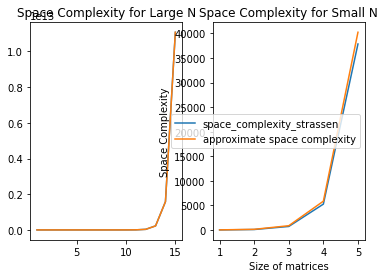

In [85]:
import matplotlib.pyplot as plt
import math as m

def space_complexity_strassen(N):
    if N == 1:
        return 1
    else:
        return 7*space_complexity_strassen(N/2) + N**2

def approximate_space_complexity_strassen(N):
    return N**2 + 7/3*m.pow(N,np.log10(7)/np.log10(2))

plt.subplot(1, 2, 1)

sizes = range(1, 16)

space_complexity = [space_complexity_strassen(2**i) for i in sizes]
plt.plot(sizes, space_complexity, label="space_complexity_strassen")

approximate_space_complexity = [approximate_space_complexity_strassen(2**i) for i in sizes]
plt.plot(sizes, approximate_space_complexity, label="approximate space complexity")

plt.title("Space Complexity for Large N")

plt.subplot(1, 2, 2)

sizes = range(1, 6)

space_complexity = [space_complexity_strassen(2**i) for i in sizes]
plt.plot(sizes, space_complexity, label="space_complexity_strassen")#

approximate_space_complexity = [approximate_space_complexity_strassen(2**i) for i in sizes]
plt.plot(sizes, approximate_space_complexity, label="approximate space complexity")

plt.title("Space Complexity for Small N")

plt.xlabel("Size of matrices")
plt.ylabel("Space Complexity")

plt.legend()
plt.show()

## Time Complexity for Strassen Matrix Multiplication

If the time complexity of the strassen method is 

$$y = c_a x^\alpha$$

then 

$$\log(y) = \log(c_a) + \alpha \log(x)$$

so we can use linear regression to find the gradient of log(y) which gives us the exponent and the y-intercept of log(y) to find the gradient of y. The output should be exponent should be close to 2.78.

In [36]:
#Plot the average time taken against the size of the matrices
sizes, times = time_function_2D(multiply_strassen, [2**i for i in np.arange(7, 9, 1)])
constants = stats.linregress(np.log(sizes), np.log(times))
print("Naive matrix multiplication time complexity: ", np.exp(constants[1]), "exp(", constants[0],")")

Naive matrix multiplication time complexity:  3.0650807903136233e-06 exp( 2.772514629818619 )


## Naive Method Vs Strassen's Method

For large values of N the higher order terms dominate the time complexity of the two equations but for smaller values of N the lower order terms will dominate. This can be seen in the below plots as Strassen's method takes longer to run for small values of N but at a certain value of N the naive method will start to take longer which typically happens for values of N between 45 and 100. This means it is best to use a hybrid approach setting the base case to be for N <= 45 therefore taking advantage of the faster times of the naive method for those values.

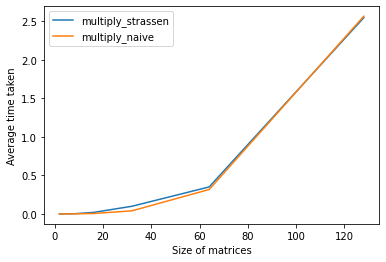

In [45]:
sizes, times = time_function_2D(multiply_strassen, [2**i for i in np.arange(1, 8, 1)])
plt.plot(sizes, times, label="multiply_strassen")

#Plot the average time taken against the size of the matrices
sizes, times = time_function_2D(multiply_naive, [2**i for i in np.arange(1, 8, 1)])
plt.plot(sizes, times, label="multiply_naive")

plt.xlabel("Size of matrices")
plt.ylabel("Average time taken")


plt.legend()
plt.show()